In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('../funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [39]:
df_subset= df[['price','area', 'year_built']]
df2= df_subset[(df_subset["price"]>20000) & (df_subset["area"] > 20) & (df_subset['year_built']>1800)]
print(df2.head())

    price  area  year_built
0  510000   108        1906
1  215000    47        1938
2  325000   116        2003
3  315000    58        1910
4  200000    63        1906


In [40]:
y = df2['price'] #We need to take out the price as our Y-variable
X = df2.loc[:,'area':'year_built'] #this slices the dataframe to include all rows and the columns from "area" to "rooms"
X.index = df2['price'] #this stores the price in the column names, so we don't lose track of them later
X.head()

,area,year_built
price,,
510000,108,1906
215000,47,1938
325000,116,2003
315000,58,1910
200000,63,1906


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,area,year_built
price,,
335000,75,1991
325000,62,1902
225000,50,1936
189000,54,1906
144901,63,2015


In [42]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [43]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
3903.482620,area
-1480.875534,year_built


The coefficients show that for every $1m^2$ added to the surface area, the price goes up by 3816 euros. 
Next to that, every year that the house is older, the price goes down by 1480 euros. 

In [44]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)


0.6607702681559624

The $R^2$ is 0.66 which means more than half of the variation can be explained by the model. 

In [45]:
math.sqrt(mean_squared_error(y_test, y_test_p))

100240.24242288167

The RMSE is 100.240 euro which means we are on average, typically 100240 euros off on the predicted price. 

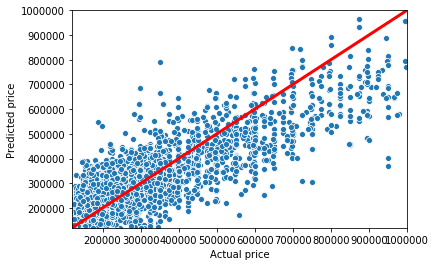

In [46]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.xlim([120000,1000000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([120000,1000000])
plt.plot([120000,1000000], [120000,1000000], color='red', lw=3) #Plot a diagonal length
plt.show()

The plot shows that the houses which are lower priced (<400.000) are predicted better than the house that cost higher than that. This can be read from the plot as the blue dots are closer to the red line when the price is < 400.000. The prices that are very high are predicted more poorly. As they are under the red lines, it suggests that they cost too little. the model has a big variance for middle class houses and a bias for the higher class houses.

In [47]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df2[['area','year_built']] 
y = df2['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model: minimize the size of the residuals 

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0]#lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1]


print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X2") #.0f formats to 2 decimals.

The regression line is equal to y = 2902940.02 + 3953.12X + -1492.69X2


The first coefficient is 2902940.02, which is the intersect with the Y-ax. the 3953.12 is the amount of euros the price goes up whenever the house goes up by $1m^2$ and the price goes down with 1492 when the house gets one year older.